# FEMA Disaster Analysis

This notebook analyzes FEMA disaster data to understand the distribution and impact of various disaster types, as well as the assistance provided. We will explore trends, correlations, and visualize key insights.

In [1]:
import pandas as pd

file = "dataset/preprocessed/FEMA.csv"
dates = ['declarationDate', 'incidentBeginDate', 'incidentEndDate', 'disasterCloseoutDate']

df = pd.read_csv(file, index_col = False, parse_dates = dates, low_memory = False)

In [2]:
df.head()

,Unnamed: 0,disasterNumber,zipCode,city,validRegistrations,averageFemaInspectedDamage,totalInspected,totalDamage,noFemaInspectedDamage,femaInspectedDamageBetween1And10000,...,incidentType,declarationTitle,ihProgramDeclared,iaProgramDeclared,paProgramDeclared,hmProgramDeclared,incidentBeginDate,incidentEndDate,disasterCloseoutDate,disasterLength
0,0,1439,70005,BEAUMONT,1,0.00,0,0.00,1,0.0,...,Severe Storm,"SEVERE STORMS, TORNADOES AND FLOODING",1,1,0,0,2002-10-24 00:00:00+00:00,2002-11-15 00:00:00+00:00,2013-03-26 00:00:00+00:00,22 days
1,1,1439,75852,MIDWAY,7,20100.42,7,120602.52,1,0.0,...,Severe Storm,"SEVERE STORMS, TORNADOES AND FLOODING",1,1,0,0,2002-10-24 00:00:00+00:00,2002-11-15 00:00:00+00:00,2013-03-26 00:00:00+00:00,22 days
2,2,1439,75862,TRINITY,7,8760.72,6,43803.60,2,1.0,...,Severe Storm,"SEVERE STORMS, TORNADOES AND FLOODING",1,1,0,0,2002-10-24 00:00:00+00:00,2002-11-15 00:00:00+00:00,2013-03-26 00:00:00+00:00,22 days
3,3,1439,75931,BROOKELAND,1,1703.64,1,1703.64,0,1.0,...,Severe Storm,"SEVERE STORMS, TORNADOES AND FLOODING",1,1,0,0,2002-10-24 00:00:00+00:00,2002-11-15 00:00:00+00:00,2013-03-26 00:00:00+00:00,22 days
4,4,1439,75951,JASPER,256,765.00,233,168300.70,57,177.0,...,Severe Storm,"SEVERE STORMS, TORNADOES AND FLOODING",1,1,0,0,2002-10-24 00:00:00+00:00,2002-11-15 00:00:00+00:00,2013-03-26 00:00:00+00:00,22 days


In [3]:
df = df.set_index(['disasterNumber','zipCode','city'])
print(df.shape)
df

(228159, 36)


Unnamed: 0  validRegistrations  \
disasterNumber zipCode city                                          
1439           70005   BEAUMONT              0                   1   
               75852   MIDWAY                1                   7   
               75862   TRINITY               2                   7   
               75931   BROOKELAND            3                   1   
               75951   JASPER                4                 256   
...                                        ...                 ...   
4851           24747   LASHMEET         228154                   1   
                       ROCK             228155                  24   
               25841   FLAT TOP         228156                   1   
               25922   SPANISHBURG      228157                   2   
               25971   LERONA           228158                   1   

                                    averageFemaInspectedDamage  \
disasterNumber zipCode city                                      
1439           70005   BEAUMONT                           0.00   
               75852   MIDWAY                         20100.42   
               75862   TRINITY                         8760.72   
               75931   BROOKELAND                      1703.64   
               75951   JASPER                           765.00   
...                                                        ...   
4851           24747   LASHMEET                        6779.98   
                       ROCK                            4608.30   
               25841   FLAT TOP                        6779.98   
               25922   SPANISHBURG                      150.00   
               25971   LERONA                             0.00   

                                    totalInspected  totalDamage  \
disasterNumber zipCode city                                       
1439           70005   BEAUMONT                  0         0.00   
               75852   MIDWAY                    7    120602.52   
               75862   TRINITY                   6     43803.60   
               75931   BROOKELAND                1      1703.64   
               75951   JASPER                  233    168300.70   
...                                            ...          ...   
4851           24747   LASHMEET                  1      6779.98   
                       ROCK                     13    110599.30   
               25841   FLAT TOP                  1      6779.98   
               25922   SPANISHBURG               2       300.00   
               25971   LERONA                    1         0.00   

                                    noFemaInspectedDamage  \
disasterNumber zipCode city                                 
1439           70005   BEAUMONT                         1   
               75852   MIDWAY                           1   
               75862   TRINITY                          2   
               75931   BROOKELAND                       0   
               75951   JASPER                          57   
...                                                   ...   
4851           24747   LASHMEET                         0   
                       ROCK                             5   
               25841   FLAT TOP                         0   
               25922   SPANISHBURG                      1   
               25971   LERONA                           1   

                                    femaInspectedDamageBetween1And10000  \
disasterNumber zipCode city                                               
1439           70005   BEAUMONT                                     0.0   
               75852   MIDWAY                                       0.0   
               75862   TRINITY                                      1.0   
               75931   BROOKELAND                                   1.0   
               75951   JASPER                                     177.0   
...                                                                 ...   


In [4]:
df.describe()

,Unnamed: 0,validRegistrations,averageFemaInspectedDamage,totalInspected,totalDamage,noFemaInspectedDamage,femaInspectedDamageBetween1And10000,femaInspectedDamageBetween10001And20000,femaInspectedDamageBetween20001And30000,femaInspectedDamageGreaterThan30000,...,approvedBetween25001AndMax,totalMaxGrants,totalWithModerateDamage,totalWithMajorDamage,totalWithSubstantialDamage,fyDeclared,ihProgramDeclared,iaProgramDeclared,paProgramDeclared,hmProgramDeclared
count,228159.000000,228159.000000,2.281590e+05,228159.000000,2.281590e+05,228159.000000,228159.000000,228159.000000,228159.000000,228159.000000,...,228159.00000,228159.000000,228159.000000,228159.000000,228159.000000,228159.000000,228159.000000,228159.000000,228159.000000,228159.000000
mean,114079.000000,109.307259,1.862426e+03,57.550892,1.590984e+05,50.224756,23.064289,1.903572,0.753834,0.856109,...,2.93949,2.590444,2.527146,0.318164,0.111361,2015.489163,0.391411,0.051078,0.899456,0.944083
std,65863.974371,614.399753,2.236167e+05,360.127108,2.661619e+06,362.921182,157.271609,24.082190,15.160151,21.309059,...,45.64883,25.217685,34.608345,9.300601,5.885056,6.841955,0.488067,0.220158,0.300725,0.229762
min,0.000000,1.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,2003.000000,0.000000,0.000000,0.000000,0.000000
25%,57039.500000,1.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,2010.000000,0.000000,0.000000,1.000000,1.000000
50%,114079.000000,3.000000,0.000000e+00,1.000000,0.000000e+00,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,2017.000000,0.000000,0.000000,1.000000,1.000000
75%,171118.500000,18.000000,9.317350e+02,9.000000,5.519990e+03,6.000000,2.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,2021.000000,1.000000,0.000000,1.000000,1.000000
max,228158.000000,42337.000000,1.067610e+08,24818.000000,4.078167e+08,32008.000000,8976.000000,2057.000000,2614.000000,2902.000000,...,7275.00000,4306.000000,5215.000000,2321.000000,1404.000000,2025.000000,1.000000,1.000000,1.000000,1.000000


In [5]:
df[df['totalDamage'] > 2.5e8].head(10)


Unnamed: 0  validRegistrations  \
disasterNumber zipCode city                                              
1603           70043   CHALMETTE             28002               19916   
               70122   NEW ORLEANS           28500               33620   
               70126   NEW ORLEANS           28553               30919   
1604           39520   BAY SAINT LOUIS       30271               11481   
4673           33908   FORT MYERS           195794               12083   

                                        averageFemaInspectedDamage  \
disasterNumber zipCode city                                          
1603           70043   CHALMETTE                         629151.66   
               70122   NEW ORLEANS                       188377.91   
               70126   NEW ORLEANS                       311375.65   
1604           39520   BAY SAINT LOUIS                   137855.13   
4673           33908   FORT MYERS                         51241.21   

                                        totalInspected   totalDamage  \
disasterNumber zipCode city                                            
1603           70043   CHALMETTE                 12568  4.078167e+08   
               70122   NEW ORLEANS               10326  2.586028e+08   
               70126   NEW ORLEANS               14372  3.065912e+08   
1604           39520   BAY SAINT LOUIS            9806  2.915196e+08   
4673           33908   FORT MYERS                 7418  2.730513e+08   

                                        noFemaInspectedDamage  \
disasterNumber zipCode city                                     
1603           70043   CHALMETTE                        11667   
               70122   NEW ORLEANS                      20596   
               70126   NEW ORLEANS                      21560   
1604           39520   BAY SAINT LOUIS                   5297   
4673           33908   FORT MYERS                         895   

                                        femaInspectedDamageBetween1And10000  \
disasterNumber zipCode city                                                   
1603           70043   CHALMETTE                                      614.0   
               70122   NEW ORLEANS                                    695.0   
               70126   NEW ORLEANS                                    267.0   
1604           39520   BAY SAINT LOUIS                                555.0   
4673           33908   FORT MYERS                                    1351.0   

                                        femaInspectedDamageBetween10001And20000  \
disasterNumber zipCode city                                                       
1603           70043   CHALMETTE                                          938.0   
               70122   NEW ORLEANS                                        503.0   
               70126   NEW ORLEANS                                        622.0   
1604           39520   BAY SAINT LOUIS                                   1498.0   
4673           33908   FORT MYERS                                        1391.0   

                                        femaInspectedDamageBetween20001And30000  \
disasterNumber zipCode city                                                       
1603           70043   CHALMETTE                                          174.0   
               70122   NEW ORLEANS                                        132.0   
               70126   NEW ORLEANS                                        177.0   
1604           39520   BAY SAINT LOUIS                                    765.0   
4673           33908   FORT MYERS                                         914.0   

                                        femaInspectedDamageGreaterThan30000  \
disasterNumber zipCode city                                                   
1603           70043   CHALMETTE                                     2902.0   
               70122   NEW ORLEANS                                   1859.0   
               70126   NEW ORLEANS 

In [6]:
df.columns

Index(['Unnamed: 0', 'validRegistrations', 'averageFemaInspectedDamage',
       'totalInspected', 'totalDamage', 'noFemaInspectedDamage',
       'femaInspectedDamageBetween1And10000',
       'femaInspectedDamageBetween10001And20000',
       'femaInspectedDamageBetween20001And30000',
       'femaInspectedDamageGreaterThan30000', 'approvedForFemaAssistance',
       'totalApprovedIhpAmount', 'repairReplaceAmount', 'rentalAmount',
       'otherNeedsAmount', 'approvedBetween1And10000',
       'approvedBetween10001And25000', 'approvedBetween25001AndMax',
       'totalMaxGrants', 'id', 'totalWithModerateDamage',
       'totalWithMajorDamage', 'totalWithSubstantialDamage', 'declarationDate',
       'fyDeclared', 'declarationType', 'incidentType', 'declarationTitle',
       'ihProgramDeclared', 'iaProgramDeclared', 'paProgramDeclared',
       'hmProgramDeclared', 'incidentBeginDate', 'incidentEndDate',
       'disasterCloseoutDate', 'disasterLength'],
      dtype='object')

In [7]:
group_df = df.iloc[:,1:23].groupby('disasterNumber').sum()
group_df

,validRegistrations,averageFemaInspectedDamage,totalInspected,totalDamage,noFemaInspectedDamage,femaInspectedDamageBetween1And10000,femaInspectedDamageBetween10001And20000,femaInspectedDamageBetween20001And30000,femaInspectedDamageGreaterThan30000,approvedForFemaAssistance,...,rentalAmount,otherNeedsAmount,approvedBetween1And10000,approvedBetween10001And25000,approvedBetween25001AndMax,totalMaxGrants,id,totalWithModerateDamage,totalWithMajorDamage,totalWithSubstantialDamage
disasterNumber,,,,,,,,,,,,,,,,,,,,,
1439,26224,1199831.16,23578,43195345.95,9517,14099.0,639.0,106.0,26.0,19205,...,10216053.37,25243807.66,14835,3788,582,4,6aea447b-b44b-45c5-855a-f80be2d81d1490f17f3e-0...,0.0,0.0,0.0
1440,374,44798.52,358,725363.65,89,269.0,1.0,0.0,1.0,272,...,17782.00,94183.06,247,23,2,1,1bcb0b60-4a35-4599-b620-fe3006f2bf059f5c6db3-2...,0.0,0.0,0.0
1441,1259,625545.04,674,8686327.88,311,318.0,19.0,3.0,74.0,400,...,213917.00,1119666.22,276,97,27,12,ed906c97-fe28-4cbc-b0b9-35d8ad9a551b70cd21de-b...,0.0,0.0,0.0
1442,1148,637641.13,749,13802600.00,262,329.0,25.0,7.0,139.0,523,...,397891.08,1749658.50,297,133,93,17,fbe4bf86-73be-49dd-8c8b-5545aa7255b267c6aeee-3...,0.0,0.0,0.0
1443,1218,27576.92,886,2698015.06,631,274.0,11.0,4.0,25.0,542,...,305195.00,1349590.93,460,62,20,4,629ac9b2-4d38-4e80-8808-7b366c464abbb878c32b-d...,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4842,87,28082.06,71,96449.36,52,20.0,1.0,0.0,0.0,13,...,0.00,19552.49,13,0,0,0,9ba7602e-d7ea-417e-9ada-9f7a09adff05d20c89be-a...,0.0,0.0,0.0
4843,3053,34693.34,2575,14209060.98,872,911.0,439.0,111.0,50.0,1925,...,200154.00,8577281.12,969,327,629,3,6c23e4de-6cb7-40a8-9842-b7231ec45b33c07f119d-6...,415.0,10.0,0.0
4844,21,0.00,0,0.00,12,0.0,0.0,0.0,0.0,0,...,0.00,0.00,0,0,0,0,c3700bd5-a65e-4d18-a62a-ad251ed1d9cd5cb19e35-7...,0.0,0.0,0.0


In [8]:
cat_vars = df.iloc[:,23:36].groupby('disasterNumber').first()
agg_df = cat_vars.reset_index().merge(group_df.reset_index(), on = 'disasterNumber').set_index('disasterNumber')

In [9]:
agg_df.columns

Index(['declarationDate', 'fyDeclared', 'declarationType', 'incidentType',
       'declarationTitle', 'ihProgramDeclared', 'iaProgramDeclared',
       'paProgramDeclared', 'hmProgramDeclared', 'incidentBeginDate',
       'incidentEndDate', 'disasterCloseoutDate', 'disasterLength',
       'validRegistrations', 'averageFemaInspectedDamage', 'totalInspected',
       'totalDamage', 'noFemaInspectedDamage',
       'femaInspectedDamageBetween1And10000',
       'femaInspectedDamageBetween10001And20000',
       'femaInspectedDamageBetween20001And30000',
       'femaInspectedDamageGreaterThan30000', 'approvedForFemaAssistance',
       'totalApprovedIhpAmount', 'repairReplaceAmount', 'rentalAmount',
       'otherNeedsAmount', 'approvedBetween1And10000',
       'approvedBetween10001And25000', 'approvedBetween25001AndMax',
       'totalMaxGrants', 'id', 'totalWithModerateDamage',
       'totalWithMajorDamage', 'totalWithSubstantialDamage'],
      dtype='object')

In [10]:
agg_df.head(3)

,declarationDate,fyDeclared,declarationType,incidentType,declarationTitle,ihProgramDeclared,iaProgramDeclared,paProgramDeclared,hmProgramDeclared,incidentBeginDate,...,rentalAmount,otherNeedsAmount,approvedBetween1And10000,approvedBetween10001And25000,approvedBetween25001AndMax,totalMaxGrants,id,totalWithModerateDamage,totalWithMajorDamage,totalWithSubstantialDamage
disasterNumber,,,,,,,,,,,,,,,,,,,,,
1439,2002-11-05 00:00:00+00:00,2003,DR,Severe Storm,"SEVERE STORMS, TORNADOES AND FLOODING",1,1,0,0,2002-10-24 00:00:00+00:00,...,10216053.37,25243807.66,14835,3788,582,4,6aea447b-b44b-45c5-855a-f80be2d81d1490f17f3e-0...,0.0,0.0,0.0
1440,2002-11-08 00:00:00+00:00,2003,DR,Earthquake,EARTHQUAKE,0,0,1,1,2002-11-03 00:00:00+00:00,...,17782.00,94183.06,247,23,2,1,1bcb0b60-4a35-4599-b620-fe3006f2bf059f5c6db3-2...,0.0,0.0,0.0
1441,2002-11-13 00:00:00+00:00,2003,DR,Severe Storm,SEVERE STORMS AND TORNADOS,0,0,1,0,2002-11-09 00:00:00+00:00,...,213917.00,1119666.22,276,97,27,12,ed906c97-fe28-4cbc-b0b9-35d8ad9a551b70cd21de-b...,0.0,0.0,0.0


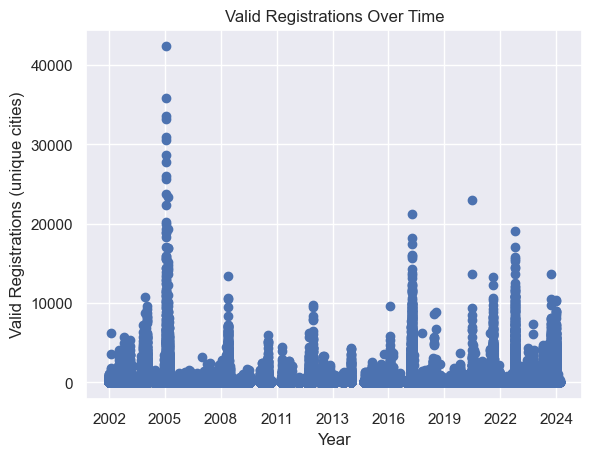

In [13]:
import matplotlib.dates as dlt
import matplotlib.dates as mdates
import seaborn as sns
import matplotlib.pyplot as plt


sns.set()
declarationDates = mdates.date2num(df['declarationDate'])
plt.plot(declarationDates, df['validRegistrations'], marker='o', linestyle='none')
plt.xlabel('Year')
plt.ylabel('Valid Registrations (unique cities)')
plt.title('Valid Registrations Over Time')
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

plt.show()

In [14]:
agg_df.to_csv('dataset/preprocessed/aggregate_FEMA.csv', index = 'disasterNumber')

## Conclusion

This analysis provided insights into the distribution and impact of FEMA disaster declarations. We observed significant correlations between valid registrations and various grant categories. The visualizations highlighted the distribution of damages across different disaster types and over time.